# What does this Notebook do?
This Notebook reads in the selected river basins, saves their info in a DataFrame and visualises them on a map.
The stations were selected based on conversations with ECCC & Martyn Clark, as well as data availability on the WaterOffice Canada website: https://wateroffice.ec.gc.ca/mainmenu/historical_data_index_e.html

In [1]:
import geopandas as gpd
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Specify basins shapefiles directory and station numbers
shapefiles = "/Users/lla068/Desktop/data_driven_forecasting/basins/"
basinno = ['05BB001','08NG065','08KB001','09CD001','09DD003','02GA041','02OJ007','01AD004','02LG005']

,Station,StationNam,Stn_UID,Shp_Area,Shp_Perime,geometry,HydexArea
0,05BB001,BOW RIVER AT BANFF,05BB001_1,2209.593735,340.817572,"POLYGON Z ((-116.45854 51.72693 0.00000, -116....",NaN
1,08NG065,KOOTENAY RIVER AT FORT STEELE,08NG065_1,11469.599609,938.643005,"POLYGON Z ((-115.65527 49.61030 0.00000, -115....",None
2,08KB001,FRASER RIVER AT SHELLEY,08KB001_1,32436.599609,1968.160034,"POLYGON Z ((-122.61240 53.99059 0.00000, -122....",None
3,09CD001,YUKON RIVER ABOVE WHITE RIVER,09CD001_1,149347.229154,3246.830544,"POLYGON Z ((-139.85081 63.13083 0.00000, -139....",NaN
4,09DD003,STEWART RIVER AT THE MOUTH,09DD003_1,51023.181464,1945.439489,"POLYGON Z ((-136.56373 64.34605 0.00000, -136....",NaN
5,02GA041,GRAND RIVER NEAR DUNDALK,02GA041_1,66.500000,NaN,"POLYGON Z ((-80.33917 44.24417 0.00000, -80.33...",NaN
6,02OJ007,RICHELIEU (RIVIERE) AUX RAPIDES FRYERS,02OJ007_1,22000.000000,NaN,"POLYGON Z ((-73.27833 45.41333 0.00000, -73.26...",NaN
7,01AD004,SAINT JOHN RIVER AT EDMUNDSTON,01AD004_1,15500.000000,NaN,"POLYGON Z ((-69.25917 47.82333 0.00000, -69.25...",NaN
8,02LG005,GATINEAU (RIVIERE) AUX RAPIDES CEIZUR,02LG005_1,6840.000000,NaN,"POLYGON Z ((-75.42667 48.17250 0.00000, -75.42...",NaN


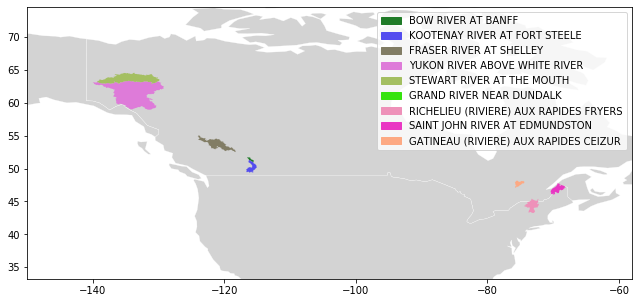

In [3]:
# Select specific basins given their station numbers and display their info in a GeoDataFrame
crs = "EPSG:4326"
for b in range(len(basinno)):
    basinshp = gpd.read_file(shapefiles+basinno[b][:2]+".shp")
    basin = basinshp[basinshp['Station']==basinno[b]]
    if b == 0:
        basins = basin
    else:
        basins = gpd.GeoDataFrame( pd.concat( [basins, basin], ignore_index=True) , crs=crs )
basins = basins.reset_index(drop=True)
display(basins)

# Plot the selected basins
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='lightgrey')
levels = range(32,256,32)
patches = []
randomcolors = {}

for b in range(len(basinno)):
    red, green, blue = random.random(), random.random(), random.random() 
    randomcolor = (red, green, blue)
    randomcolors[basinno[b]] = [randomcolor]
    basins.loc[basins['Station'] == basinno[b]].plot(ax=ax, facecolor=randomcolor)
    patches += [mpatches.Patch(color=randomcolor, label=basins.iloc[b].StationNam)]
minx, miny, maxx, maxy = min(basins.geometry.bounds.minx),min(basins.geometry.bounds.miny),max(basins.geometry.bounds.maxx),max(basins.geometry.bounds.maxy)
ax.set_xlim(minx - 10, maxx + 10)
ax.set_ylim(miny - 10, maxy + 10)
plt.legend(handles=patches);

In [12]:
# Store data for use in other Notebooks
%store basinno
%store basins
%store randomcolors

Stored 'basinno' (list)
Stored 'basins' (GeoDataFrame)
Stored 'randomcolors' (dict)
